In [1]:
# Import Libraries
import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
path = '01 - Data/ecom customer_data.xlsx'

In [2]:
df = pd.read_excel(path)

In [3]:
# Reasssign NULLS to a new Dataframe
no_gender = df.copy()
df.dropna(subset = ['Gender'], inplace = True)
no_gender.dropna(subset = ['Gender'], inplace = True)
no_gender['Gender'] = no_gender['Gender'].fillna('No Gender')
# no_gender.head(10)

In [ ]:
ax = df.groupby('Gender').count()['Asus'].plot.bar()
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: >

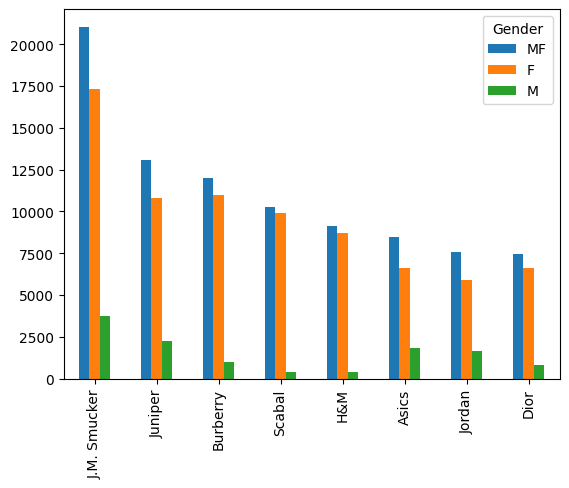

In [63]:
df_t = df.copy()
df_t = df_t.groupby('Gender').sum().T
df_t['MF'] = df_t['M'] + df_t['F']
df_t = df_t[['MF', 'F', 'M']]
df_t = df_t.sort_values(by = 'MF', ascending = False)

df_t.head(10)
df_t[2:10].plot.bar()